In [1]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np 
import pandas as pd
import matplotlib
matplotlib.rcParams.update({'font.size': 12})
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, accuracy_score
from sklearn.mixture import GaussianMixture
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.preprocessing import StandardScaler 
from sklearn.decomposition import FactorAnalysis
from sklearn.decomposition import PCA
from sklearn.datasets import load_boston
from sklearn.datasets import make_blobs

#### Define an interface of plotting:

In [2]:
def plot_api(width=10, length=8):
    fig, ax = plt.subplots(figsize=(width,length))
    return fig, ax

#### Simulate a data set for clustering

In [3]:
X, y = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)
#print(X)

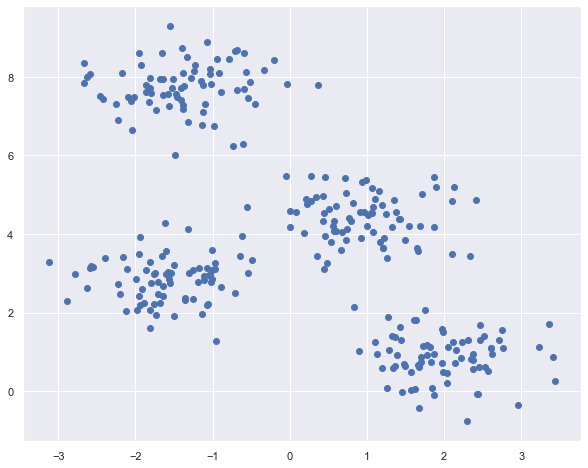

In [4]:
fig, ax = plot_api()
ax.scatter(X[:,0], X[:,1])

113.13267210634592
0.34285631540483047
[2 0 3 6 2 4 7 8 6 6 9 0 8 0 5 3 3 4 1 7 4 2 3 9 9 3 2 3 9 3 6 0 8 0 0 0 0
 0 9 5 8 7 3 8 7 1 6 7 0 2 9 4 6 2 2 1 6 7 0 2 0 3 6 1 9 1 0 4 0 1 8 1 6 1
 7 6 9 3 5 6 5 3 2 2 6 3 4 3 0 0 3 2 0 9 1 8 2 4 3 9 6 5 6 5 3 4 5 8 0 3 7
 1 5 0 5 8 0 2 2 3 1 5 1 2 2 2 5 7 2 7 6 7 7 5 0 7 9 0 8 6 0 1 8 1 8 7 0 3
 0 0 0 3 0 3 5 1 6 7 2 3 0 3 3 2 3 9 7 3 2 8 8 6 2 8 1 6 4 4 3 1 4 8 9 1 3
 8 3 3 4 0 3 1 3 3 7 7 9 8 7 0 8 1 5 7 8 0 1 6 3 0 8 7 3 8 0 1 1 5 5 3 0 4
 5 9 5 9 8 6 6 8 8 6 3 2 1 3 5 1 6 9 4 3 4 0 0 0 0 1 1 0 8 1 2 3 9 9 1 5 4
 0 3 3 9 2 6 1 8 6 3 4 2 9 7 8 4 5 2 8 6 0 4 4 8 4 4 4 0 1 6 8 5 2 0 6 6 2
 4 3 6 9]


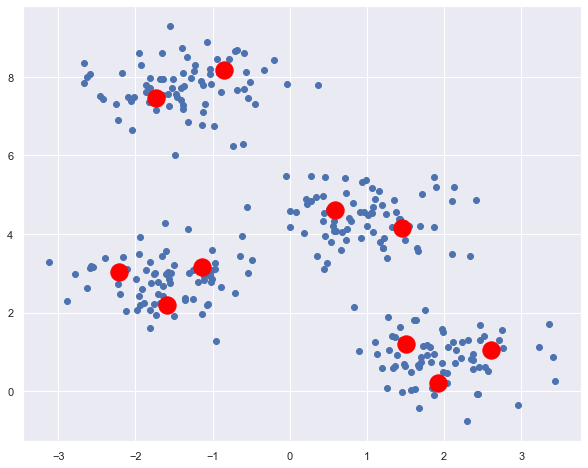

In [5]:
kmeans = KMeans(10, random_state=0)
labels = kmeans.fit(X).predict(X)
#print(labels)
print(kmeans.inertia_)
score = silhouette_score(X, kmeans.labels_)
print(score)
print(labels)
fig, ax = plot_api()
ax.scatter(X[:,0], X[:,1])
ax.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red')


In [6]:
gm = GaussianMixture(n_components=4).fit(X)
labels = gm.predict(X)
print(labels)
AIC = gm.aic(X)
BIC = gm.bic(X)
print(AIC)
print(BIC)


[3 1 2 1 3 3 0 2 1 1 0 1 2 1 3 2 2 3 0 0 3 3 2 0 0 2 3 2 0 2 1 1 2 1 1 1 1
 1 0 3 2 0 2 2 0 0 1 0 1 3 0 3 1 3 3 0 1 0 1 3 1 2 1 0 0 0 1 3 1 0 2 0 1 0
 0 1 0 2 3 1 3 2 3 3 1 2 3 2 1 1 2 3 1 0 0 2 3 3 2 0 1 3 1 3 2 3 3 2 1 2 0
 0 3 1 3 2 1 3 3 2 0 3 0 3 3 3 3 0 3 0 1 0 0 3 1 0 0 1 2 1 1 0 2 0 2 0 1 2
 1 1 1 2 1 2 3 0 1 0 3 2 1 2 2 3 2 0 0 2 3 2 2 1 3 2 0 1 3 3 2 0 3 2 0 0 2
 2 2 2 3 1 2 0 2 2 0 0 0 2 0 1 2 0 3 0 2 1 0 1 2 1 2 0 2 2 1 0 0 3 3 2 1 3
 3 0 3 0 2 1 1 2 2 1 2 3 0 2 3 0 1 0 3 2 3 1 1 1 1 0 0 1 2 0 3 2 0 0 0 3 3
 1 2 2 0 3 1 0 2 1 2 3 3 0 0 2 3 3 3 2 1 1 3 3 2 3 3 3 1 0 1 2 3 3 1 1 1 3
 3 2 1 0]
1951.2255110520396
2036.412507969132


#### Simulate data for binary classification

[-1. -1.  1.  1.  1.  1.  1. -1. -1.  1. -1. -1. -1. -1.  1.  1. -1. -1.
 -1.  1.  1.  1. -1. -1. -1.  1. -1. -1.  1.  1. -1.  1.  1.  1. -1. -1.
 -1.  1. -1. -1. -1. -1.  1. -1.  1.  1. -1.  1. -1. -1. -1. -1.  1.  1.
 -1.  1. -1. -1. -1.  1.  1. -1.  1. -1. -1. -1.  1.  1. -1.  1. -1.  1.
  1.  1.  1.  1. -1. -1. -1. -1.  1.  1.  1. -1.  1. -1. -1.  1.  1. -1.
 -1. -1.  1.  1. -1. -1.  1. -1. -1.  1.  1. -1. -1.  1.  1.  1. -1.  1.
 -1. -1.  1.  1.  1. -1. -1. -1.  1. -1. -1. -1.  1.  1.  1. -1. -1.  1.
 -1. -1. -1. -1.  1.  1.  1. -1. -1. -1.  1. -1.  1. -1. -1.  1. -1.  1.
 -1.  1.  1.  1.  1.  1.  1.  1. -1. -1.  1.  1. -1.  1. -1.  1.  1. -1.
  1.  1.  1. -1. -1. -1.  1.  1.  1. -1. -1.  1.  1.  1.  1. -1.  1.  1.
  1. -1.  1.  1. -1. -1. -1. -1.  1. -1.  1.  1. -1.  1.  1.  1. -1.  1.
 -1. -1. -1.  1.  1. -1. -1.  1. -1.  1. -1.  1.  1.  1. -1. -1.  1. -1.
 -1. -1. -1. -1. -1. -1. -1.  1. -1.  1.  1. -1.  1. -1.  1. -1.  1. -1.
  1. -1.  1.  1.  1. -1.  1.  1. -1.  1.  1. -1. -1

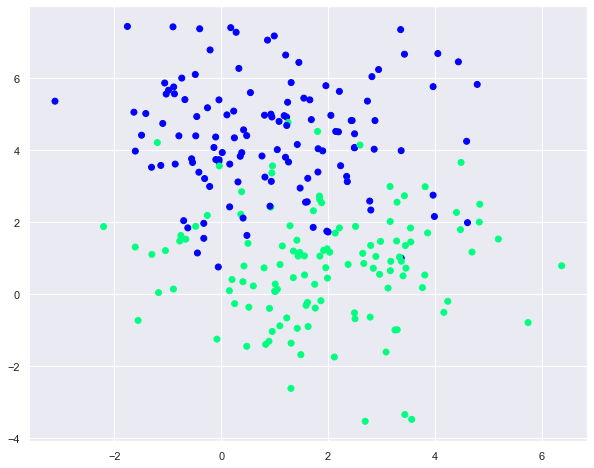

In [7]:
X, y = make_blobs(n_samples=250, centers=2,
                  random_state=0, cluster_std=1.60)
y[y == 0] = -1
tmp = np.ones(len(X))
y = tmp * y
print(y)
fig, ax = plot_api()
ax.scatter(X[:, 0], X[:, 1], c=y, cmap='winter')

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
svm = SVC(kernel='linear')
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)
accuracy_score(y_test, y_pred)

0.8571428571428571

In [9]:
logistic = LogisticRegression()
logistic.fit(X_train, y_train)
y_pred = logistic.predict(X_test)
accuracy_score(y_test, y_pred)

0.8571428571428571

In [10]:
boston=load_boston()
boston_df=pd.DataFrame(boston.data,columns=boston.feature_names)
boston_df['Price']=boston.target
xmat=boston_df.drop('Price',axis=1)
y =boston_df['Price']
X_list = xmat.columns 
print(X_list)

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')


In [11]:
ulist = [1,2,3]
for index, e in enumerate(ulist):
    print(index)
    #print(e)

0
1
2


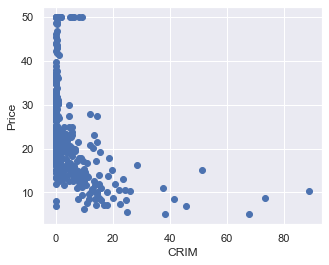

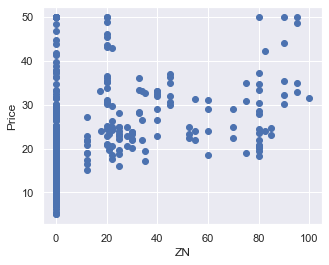

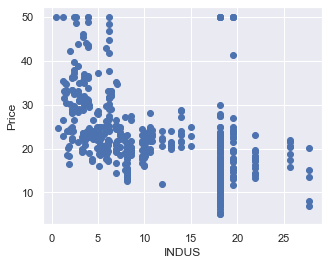

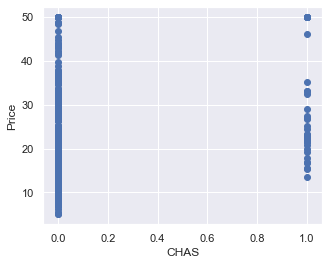

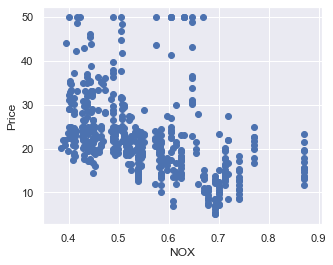

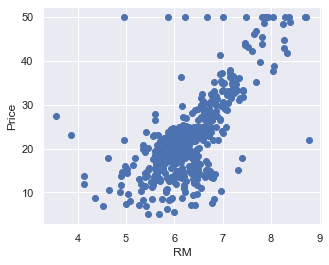

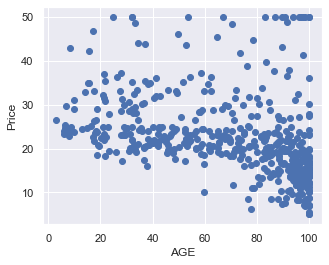

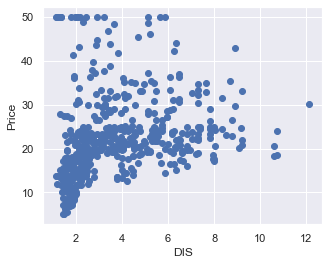

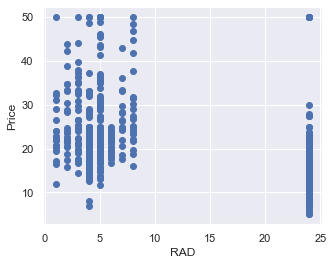

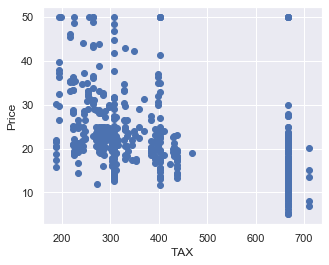

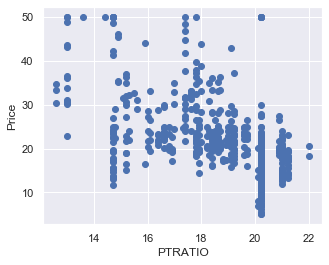

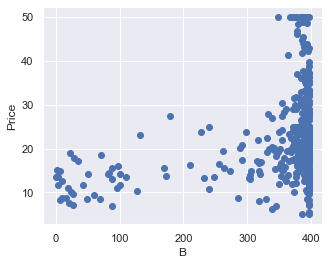

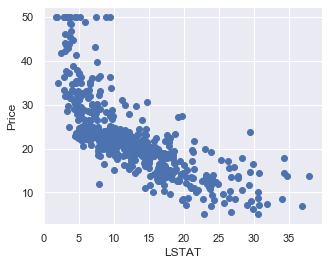

In [12]:
for index, feature_name in enumerate(boston.feature_names):
    plt.figure(figsize=(5, 4))
    plt.scatter(boston.data[:, index], boston.target)
    plt.ylabel('Price', size=12)
    plt.xlabel(feature_name, size=12)
    plt.show()

In [13]:
X_train,X_test,y_train,y_test=train_test_split(xmat,y,test_size=0.2,random_state=3)

In [14]:
rf = RandomForestRegressor(n_estimators = 100, random_state = 42)
rf.fit(X_train, y_train)
predictions = rf.predict(X_test)
test_score = rf.score(X_test, y_test)
print(test_score)
print(rf.decision_path(X_train))

0.908426262206469
(<404x47580 sparse matrix of type '<class 'numpy.int64'>'
	with 449010 stored elements in Compressed Sparse Row format>, array([    0,   475,   954,  1423,  1894,  2345,  2810,  3299,  3780,
        4257,  4716,  5191,  5654,  6129,  6602,  7101,  7588,  8083,
        8552,  9031,  9516,  9995, 10458, 10937, 11410, 11883, 12354,
       12839, 13320, 13801, 14260, 14735, 15220, 15701, 16172, 16659,
       17150, 17633, 18102, 18581, 19076, 19549, 20024, 20499, 20970,
       21443, 21924, 22417, 22900, 23377, 23846, 24315, 24812, 25275,
       25762, 26229, 26694, 27167, 27650, 28109, 28580, 29051, 29510,
       29979, 30480, 30941, 31426, 31883, 32360, 32841, 33308, 33795,
       34260, 34729, 35200, 35679, 36154, 36621, 37096, 37577, 38058,
       38541, 39018, 39499, 39976, 40449, 40934, 41435, 41926, 42425,
       42896, 43363, 43844, 44319, 44780, 45237, 45704, 46167, 46640,
       47115, 47580], dtype=int32))


In [15]:
l1 = ['a', 'b', 'c']
l2 = ['1', '2', '3']
print(list(zip(l1, l2)))

[('a', '1'), ('b', '2'), ('c', '3')]


In [16]:
def myfunc(x):
    return x[1]

print(myfunc([0,1]))

func = lambda x: x[1]
print(func([0, 1]))

1
1


In [17]:
importances = list(rf.feature_importances_)
pairs = list(zip(X_list, importances))
feature_importance = sorted(pairs, key=lambda x: x[1], reverse=True)
print(feature_importance)

[('LSTAT', 0.4479010215707768), ('RM', 0.3431203671286902), ('DIS', 0.07922327739467717), ('CRIM', 0.03756990174769936), ('NOX', 0.024782734413730474), ('AGE', 0.014861866005856053), ('TAX', 0.014012585870117313), ('PTRATIO', 0.013735037143876656), ('B', 0.011494567846982178), ('INDUS', 0.00726798869429374), ('RAD', 0.0037583708401917886), ('CHAS', 0.0013887254364857273), ('ZN', 0.0008835559066222588)]


In [18]:
lasso = Lasso(alpha=0.01)
lasso.fit(X_train,y_train)
train_score=lasso.score(X_train,y_train)
test_score=lasso.score(X_test,y_test)
coeff_used = np.sum(lasso.coef_!=0)
print(test_score)

0.7929270902369328


In [19]:
yhat = model.predict(X_train)

NameError: name 'model' is not defined

In [ ]:
enet = ElasticNet(alpha=1.0, l1_ratio=0.7)

In [ ]:
lasso = Lasso(alpha=0.01)
lasso.fit(X_train,y_train)
train_score=lasso.score(X_train,y_train)
test_score=lasso.score(X_test,y_test)
coeff_used = np.sum(lasso.coef_!=0)

In [ ]:
print(train_score)
print(test_score)
print(lasso.coef_!=0)
print(coeff_used)
print(lasso.get_params())
print(lasso.coef_)

In [ ]:
model = Lasso()
# define model evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# define grid
grid = dict()
grid['alpha'] = np.arange(0, 1, 0.01)
# define search
search = GridSearchCV(model, grid, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# perform the search
results = search.fit(xmat, y)
# summarize
print('MAE: %.3f' % results.best_score_)
print('Config: %s' % results.best_params_)
